## KAGGLE TITANIC - jak przerobić, żeby mieć przerobiony

### Cel: używając Machine Learningu przewidzieć, którzy pasażerowie Titanica przeżyją podróż.

Plan:
  1. Wczytać dane i rzucić na nie okiem.
  2. Ogarnąć kontekst historyczno-kulturowy.
  3. Wyczyścić dane, czyli:
      a) sprawdzić gdzie brakuje wartości
      b) zamienić dane na liczbowe
  3. Przeanalizować dane.
  5. Wybrać dane do wprowadzenia do modelu.
  6. Stworzyć model i sprawdzić jego skuteczność.
  7. Próbować podnieść skuteczność tworząc nowe cechy.

### 1. Wczytać dane i rzucić na nie okiem.


In [442]:
import pandas as pd

In [443]:
#import danych
df = pd.read_csv("./train.csv")
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
461,462,0,3,"Morley, Mr. William",male,34.0,0,0,364506,8.0500,NaN,S
842,843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31.0000,NaN,C
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S


In [444]:
# legenda

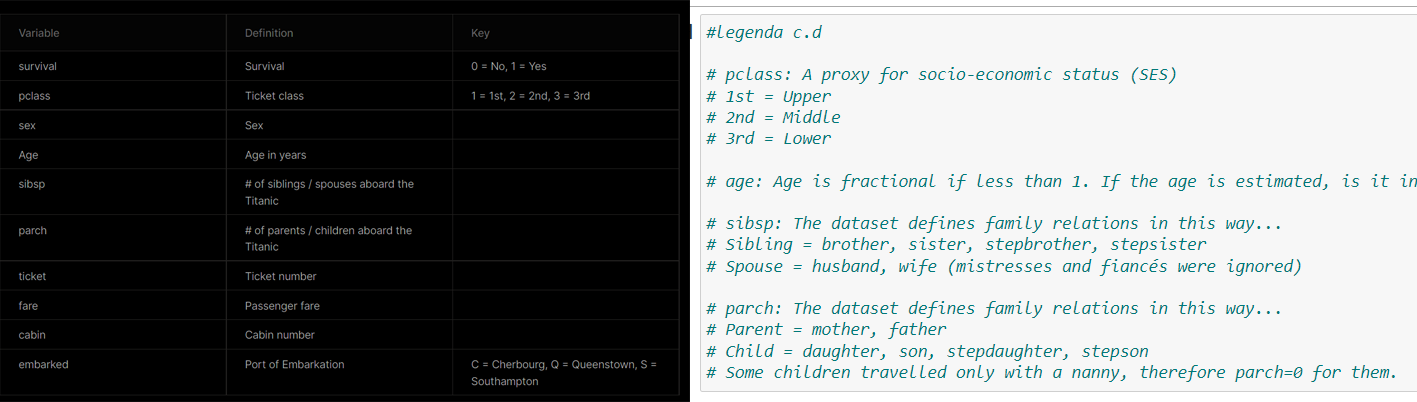

### 2.Kontekst historyczno - kulturowy

Dobrze jest mieć szerszy wgląd w sytuację i dane, które analizujemy. Tutaj ważniejsze fragmenty artykułu z Wikipedii:

>"RMS Titanic – brytyjski transatlantyk typu Olympic, który w nocy z 14 na 15 kwietnia 1912 roku, podczas dziewiczego rejsu na trasie Southampton – Cherbourg – Queenstown – Nowy Jork, zderzył się z górą lodową i zatonął.

>Dane o ofiarach są niejednoznaczne – w zależności od źródeł. Spośród 2208–2228 pasażerów i załogi „Titanica” zginęło ponad 1500 osób. Przeżyło katastrofę tylko około 730. Z pasażerów I klasy zginęło nieco mniej niż połowa, z pasażerów II klasy około 60%, z pasażerów III klasy trzy czwarte. Załogi zginęło praiwe 80%.

>W łodziach „Titanica” było miejsce dla ponad 1100 osób, ale wiele z nich było częściowo pustych. Zwłaszcza w pierwszej fazie ewakuacji łodzie odpływały z niewielką liczbą osób. Dopiero w dalszej fazie wypadku łodzie odpływały pełne. Nie podjęto niemal żadnej próby ratowania osób, które znalazły się w wodzie. Jedynie piąty oficer, Harold Lowe, rozdzielił pasażerów ze swej łodzi między inne łodzie i popłynął wydobywać z wody tych, którzy pływali w morzu, ale zrobił to zbyt późno i ocalił tylko kilka osób."

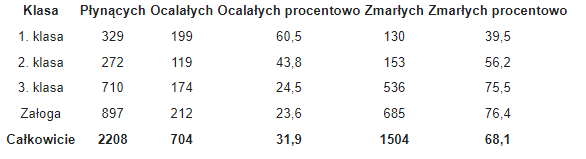

Po co dorzucam suche fakty z Wiki? Żebyśmy mogli mieć punkt odniesienia. Porównajmy dane z informacjami. Nasz zbiór zawiera 891 wierszy, czyli 40% pasażerów podróżujących Titanikiem.

W naszym zbiorze członków brak załogi (informacja potwierdzona, po prostu zbiór ich nie zawiera).

Spróbujmy wizualnie przedstawić śmiertelność z podziałem na wiek, płeć, klasę i inne czynniki:

### 3. Czyszczenie danych

In [445]:
# brakujące wartości
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [446]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [447]:
df[df['Cabin'] == "B28"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [448]:
#Miss Rose Amélie Icard, 38, was born in Vaucluse, France on 31 October 1872,
#her father Marc Icard lived at Mafs á Murs (?).
#She boarded the Titanic at Southampton as maid to Mrs George Nelson Stone.
#She travelled on Mrs Stone's ticket (#113572).

df.loc[df['Embarked'].isnull(), 'Embarked'] = 'S'

In [449]:
df.loc[df['Age'].isnull(), 'Age'] = df['Age'].median()

In [450]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [451]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
581,582,1,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",female,39.0,1,1,17421,110.8833,C68,C


In [452]:
# sprawdź pd.factorize( ['a', 'b', 'c', 'a', 'a', 'c'] )
dict = {"S" : 1, "C" : 2, "Q": 3}

df['Embarked_Int'] = df['Embarked']
df = df.replace({"Embarked_Int": dict})
df['Sex_Int'] = df['Sex'].apply(lambda x: 0 if x == 'female' else 1)

Text(0.5, 1.0, 'Wiek vs Przetrwanie')

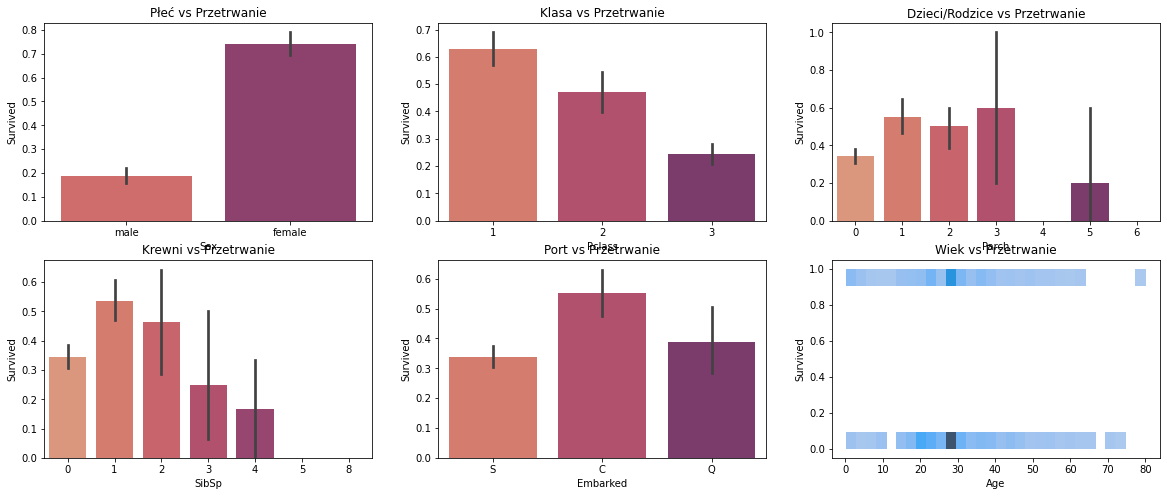

In [453]:
import matplotlib.pyplot as plt   
%matplotlib inline

import seaborn as sns

fig, ax = plt.subplots(2,3, figsize=(20,8))
sns.barplot(x="Sex", y="Survived", palette='flare', data=df, ax=ax[0][0]).set_title('Płeć vs Przetrwanie')
sns.barplot(x="Pclass", y="Survived", palette='flare', data=df, ax=ax[0][1]).set_title('Klasa vs Przetrwanie')
sns.barplot(x="Parch", y="Survived", palette='flare', data=df, ax=ax[0][2]).set_title('Dzieci/Rodzice vs Przetrwanie')
sns.barplot(x="SibSp", y="Survived", palette='flare', data=df, ax=ax[1][0]).set_title('Krewni vs Przetrwanie')
sns.barplot(x="Embarked", y="Survived", palette='flare', data=df, ax=ax[1][1]).set_title('Port vs Przetrwanie')
sns.histplot(x="Age", y='Survived', palette='flare', data=df, ax=ax[1][2]).set_title('Wiek vs Przetrwanie')


Z powyższych wykresów wynika, że:
- kobiety mają większą szansę na przetrwanie
- pasażerowie pierwszej klasy mają wiekszą szansę na przetrwanie
- podróżujący z dziećmi/rodzicami mają większą szansę na przetrwanie (chyba, że masz powyżej 3jki dzieci)
- podróżujący ze współmałżonkiem lub rodzeństwem mają większe szanse na przetrwanie
- osoby w wieku 15-30 mają mniejsze szanse na przetrwanie

I sprawdźmy jeszcze korelację zmiennych cechą Przetrwanie:

In [454]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Int,Sex_Int
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658,-0.030467,0.042939
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.106811,-0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.045702,0.131900
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,-0.009165,0.081163
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.059961,-0.114631
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.078665,-0.245489
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,0.062142,-0.182333
Embarked_Int,-0.030467,0.106811,0.045702,-0.009165,-0.059961,-0.078665,0.062142,1.000000,-0.116569
Sex_Int,0.042939,-0.543351,0.131900,0.081163,-0.114631,-0.245489,-0.182333,-0.116569,1.000000


In [455]:
df.corrwith(df['Survived']).sort_values()


Sex_Int        -0.543351
Pclass         -0.338481
Age            -0.077221
SibSp          -0.035322
PassengerId    -0.005007
is_adult        0.006138
Parch           0.081629
Embarked_Int    0.108669
Fare            0.257307
Survived        1.000000
dtype: float64

W tej chwili wiemy, że zmienne Sex, Pclass i Fare mają wpływ na to, czy pasażer przeżył podróż. Bardzo niska korelacja wieku wydaje się mało wiarygodna, ale zostawimy sobie to na później.

### Bardzo wstępne przygotowanie danych i pierwszy model ML

In [456]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [457]:
# zmienne, których będziemy uzywać w modelu (mogą być wyłącznie te zawierające wartości liczbowe):
feats = [ 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Int', 'Sex_Int' ]
X = df[feats].values

# zmienna, którą próbujemy przewidzieć:
y_train = df["Survived"].values

In [458]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (623, 7) (623,)
Test: (268, 7) (268,)


In [459]:
model =  LogisticRegression()


model.fit(X_train, y_train)    #podajemy X_train, y_train
y_pred = model.predict(X_test) #sprawdzamy na X_test

print(accuracy_score(y_test, y_pred))

0.7873134328358209


C:\Users\ancib\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [460]:
def train_and_predict(model, X, y, test_size=0.33):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2018)
    
    model.fit(X_train, y_train)    
    y_pred = model.predict(X_test) 

    return accuracy_score(y_test, y_pred)


In [461]:
train_and_predict(LogisticRegression(), X, y, test_size=0.33)

0.8395522388059702

In [462]:
#nowe kolumny:

df['has_family'] = df.apply(lambda x: 1 if (x.Parch != 0 or x.SibSp != 0) else 0, axis=1)


In [463]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Int,Sex_Int,has_family
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S,1,1,1


In [464]:
df.corrwith(df['Survived']).sort_values()

Sex_Int        -0.543351
Pclass         -0.338481
Age            -0.064910
SibSp          -0.035322
PassengerId    -0.005007
Parch           0.081629
Embarked_Int    0.106811
has_family      0.203367
Fare            0.257307
Survived        1.000000
dtype: float64

In [465]:
# zmienne, których będziemy uzywać w modelu (mogą być wyłącznie te zawierające wartości liczbowe):
feats = [ 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Int', 'Sex_Int', 'has_family' ]
X = df[feats].values

# zmienna, którą próbujemy przewidzieć:
y = df["Survived"].values

In [466]:
train_and_predict(LogisticRegression(), X, y, test_size=0.33)

C:\Users\ancib\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.8134328358208955

In [467]:
#nowe kolumny:

df['family'] = df.apply(lambda x: x.Parch + x.SibSp, axis=1)
df.corrwith(df['Survived']).sort_values()

Sex_Int        -0.543351
Pclass         -0.338481
Age            -0.064910
SibSp          -0.035322
PassengerId    -0.005007
family          0.016639
Parch           0.081629
Embarked_Int    0.106811
has_family      0.203367
Fare            0.257307
Survived        1.000000
dtype: float64

In [468]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Int,Sex_Int,has_family,family
145,146,0,2,"Nicholls, Mr. Joseph Charles",male,19.0,1,1,C.A. 33112,36.75,NaN,S,1,1,1,2


In [469]:
# zmienne, których będziemy uzywać w modelu (mogą być wyłącznie te zawierające wartości liczbowe):
feats = [ 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Int', 'Sex_Int', 'has_family', 'family' ]
X = df[feats].values

# zmienna, którą próbujemy przewidzieć:
y = df["Survived"].values

train_and_predict(LogisticRegression(), X, y, test_size=0.33)

C:\Users\ancib\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.8208955223880597

In [488]:
df['is_adult'] = df['Age'].apply(lambda x: 1 if x >= 21 else 0)
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Int,Sex_Int,has_family,family,is_adult,title_int
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658,-0.030467,0.042939,-0.057462,-0.040143,0.010835,0.016496
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.106811,-0.543351,0.203367,0.016639,-0.074200,0.339240
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.045702,0.131900,-0.135207,0.065997,-0.158714,-0.201271
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,-0.009165,0.081163,-0.171647,-0.245619,0.644438,0.040064
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.059961,-0.114631,0.584471,0.890712,-0.232980,0.059722
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.078665,-0.245489,0.583398,0.783111,-0.233564,0.093466
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,0.062142,-0.182333,0.271832,0.217138,0.025091,0.139391
Embarked_Int,-0.030467,0.106811,0.045702,-0.009165,-0.059961,-0.078665,0.062142,1.000000,-0.116569,-0.017807,-0.080281,0.057420,0.117907
Sex_Int,0.042939,-0.543351,0.131900,0.081163,-0.114631,-0.245489,-0.182333,-0.116569,1.000000,-0.303646,-0.200988,0.079377,-0.586046
has_family,-0.057462,0.203367,-0.135207,-0.171647,0.584471,0.583398,0.271832,-0.017807,-0.303646,1.000000,0.690922,-0.236978,0.123606


In [471]:
# zmienne, których będziemy uzywać w modelu (mogą być wyłącznie te zawierające wartości liczbowe):
feats = [ 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Int', 'Sex_Int', 'has_family', 'family', 'is_adult' ]
X = df[feats].values

# zmienna, którą próbujemy przewidzieć:
y = df["Survived"].values

train_and_predict(LogisticRegression(), X, y, test_size=0.33)

C:\Users\ancib\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.8097014925373134

In [472]:
#lets see what name looks like
df['Name'].sample(5)

483             Turkula, Mrs. (Hedwig)
20                Fynney, Mr. Joseph J
803    Thomas, Master. Assad Alexander
243      Maenpaa, Mr. Matti Alexanteri
13         Andersson, Mr. Anders Johan
Name: Name, dtype: object

In [473]:
df['Name'].apply(lambda x: x.split(","))

0                             [Braund,  Mr. Owen Harris]
1      [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                              [Heikkinen,  Miss. Laina]
3        [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                            [Allen,  Mr. William Henry]
                             ...                        
886                             [Montvila,  Rev. Juozas]
887                      [Graham,  Miss. Margaret Edith]
888          [Johnston,  Miss. Catherine Helen "Carrie"]
889                             [Behr,  Mr. Karl Howell]
890                               [Dooley,  Mr. Patrick]
Name: Name, Length: 891, dtype: object

In [474]:
import re

def extract_name(name):
    split_name = re.split(",|\.|\(", name)
    
    title = split_name[1].strip()

    if split_name[1] == " Mrs":
        first_name = split_name[-1].split()[0].strip()
        last_name = re.sub('[ \(\))\"]', '', split_name[-1].split()[-1] ).strip()
    
    else:
        first_name = re.sub('[ \(\))\"]', '', split_name[-1].split()[-1] ).strip()
        last_name = split_name[0].strip()
        
    return([first_name, last_name, title])
        


In [475]:
#let's get the title and names
df['new_column'] = df['Name'].apply(lambda x: extract_name(x))
df['first_name'] = df['new_column'].apply(lambda x: x[0])
df['last_name'] = df['new_column'].apply(lambda x: x[1])
df['title'] = df['new_column'].apply(lambda x: x[2])
df = df.drop(columns = ['new_column'])

In [476]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Int,Sex_Int,has_family,family,is_adult,first_name,last_name,title
812,813,0,2,"Slemen, Mr. Richard James",male,35.0,0,0,28206,10.5,NaN,S,1,1,0,0,1,James,Slemen,Mr


In [477]:
#see what it looks like
df['title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Sir               1
Don               1
Jonkheer          1
Lady              1
Mme               1
Capt              1
Ms                1
the Countess      1
Name: title, dtype: int64

In [478]:
#Mme = Mrs
#Mlle = Miss
#Master = Mr
#Ms = Mrs
#Jonkheer - Mr, error

In [479]:
df.loc[df['title'] == 'Mme', 'title'] = 'Mrs'
df.loc[df['title'] == 'Mlle', 'title'] = 'Miss'
df.loc[df['title'] == 'Master', 'title'] = 'Mr'
df.loc[df['title'] == 'Ms', 'title'] = 'Mrs'
df.loc[df['title'] == 'Jonkheer', 'title'] = 'Mr'
#see what it looks like
df['title'].value_counts()

Mr              558
Miss            184
Mrs             127
Dr                7
Rev               6
Major             2
Col               2
Don               1
Sir               1
the Countess      1
Lady              1
Capt              1
Name: title, dtype: int64

In [482]:
df['title_int'] = pd.factorize(df['title'])[0]

In [489]:
df.corrwith(df['Survived']).sort_values()

Sex_Int        -0.543351
Pclass         -0.338481
is_adult       -0.074200
Age            -0.064910
SibSp          -0.035322
PassengerId    -0.005007
family          0.016639
Parch           0.081629
Embarked_Int    0.106811
has_family      0.203367
Fare            0.257307
title_int       0.339240
Survived        1.000000
dtype: float64

In [523]:
# zmienne, których będziemy uzywać w modelu (mogą być wyłącznie te zawierające wartości liczbowe):
feats = [ 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Int', 'Sex_Int', 'has_family', 'family', 'is_adult', 'title_int' ]
X = df[feats].values

# zmienna, którą próbujemy przewidzieć:
y = df["Survived"].values

train_and_predict(LogisticRegression(), X, y, test_size=0.33)

C:\Users\ancib\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.8208955223880597

In [494]:
#get test dataset
test = pd.read_csv('./test.csv')

In [496]:
test.sample()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
355,1247,1,"Julian, Mr. Henry Forbes",male,50.0,0,0,113044,26.0,E60,S


In [498]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [518]:
test.loc[test['Age'].isnull(), 'Age'] = test['Age'].median()
test.loc[test['Fare'].isnull(), 'Fare'] = test['Fare'].mean()
# sprawdź pd.factorize( ['a', 'b', 'c', 'a', 'a', 'c'] )
dict = {"S" : 1, "C" : 2, "Q": 3}

test['Embarked_Int'] = test['Embarked']
test = test.replace({"Embarked_Int": dict})
test['Sex_Int'] = test['Sex'].apply(lambda x: 0 if x == 'female' else 1)
#nowe kolumny:

test['has_family'] = test.apply(lambda x: 1 if (x.Parch != 0 or x.SibSp != 0) else 0, axis=1)
test['family'] = test.apply(lambda x: x.Parch + x.SibSp, axis=1)
test['is_adult'] = test['Age'].apply(lambda x: 1 if x >= 21 else 0)
#let's get the title and names
test['new_column'] = test['Name'].apply(lambda x: extract_name(x))
test['first_name'] = test['new_column'].apply(lambda x: x[0])
test['last_name'] = test['new_column'].apply(lambda x: x[1])
test['title'] = test['new_column'].apply(lambda x: x[2])
test = test.drop(columns = ['new_column'])
test['title_int'] = pd.factorize(test['title'])[0]


In [519]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Embarked_Int', 'Sex_Int',
       'has_family', 'family', 'is_adult', 'first_name', 'last_name', 'title',
       'title_int'],
      dtype='object')

In [520]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Embarked_Int',
       'Sex_Int', 'has_family', 'family', 'is_adult', 'first_name',
       'last_name', 'title', 'title_int'],
      dtype='object')

In [526]:
X_train =  df[feats].values
X_test =  test[feats].values
y_train = df['Survived'].values

model.fit(X_train, y_train)    
pred = model.predict(X_test) 

C:\Users\ancib\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [530]:
test['Survived'] = pred
subm = test[['PassengerId','Survived']]
subm.to_csv('./subm.csv', index=False)